In [1]:
import pandas as pd
df = pd.read_excel('/content/chi_sq_GOF.xlsx')
df.head()

,data
0,3
1,3
2,2
3,6
4,4


In [2]:
import numpy as np

In [3]:
df.describe()

,data
count,100.000000
mean,3.120000
std,1.981123
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


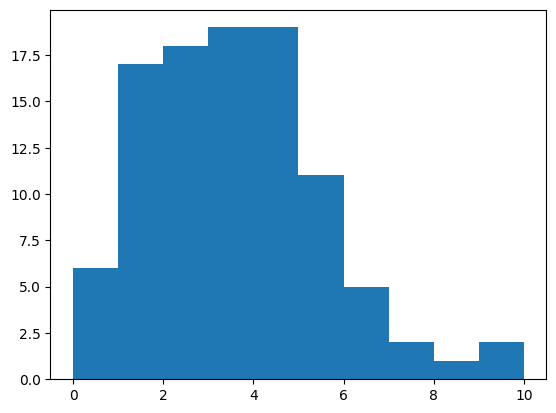

In [4]:
import matplotlib.pyplot as plt
plt.hist(df['data'])
plt.show()

In [5]:
stats_labels = ['Variance Observed]','Skew Observed','Kurt Observed']
stats_values = [round(df['data'].var(),2),round(df['data'].skew(),2),round(df['data'].kurt(),2)]
print(set(zip(stats_labels,stats_values)))

{('Variance Observed]', 3.92), ('Kurt Observed', 1.01), ('Skew Observed', 0.79)}


In [6]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, uniform, poisson
from statsmodels.graphics.gofplots import qqplot,ProbPlot
from scipy.stats import chisquare
from scipy.stats import chi2

from scipy.stats import poisson

In [7]:
grouped_df = pd.DataFrame()
grouped_df['Observed Frequency'] = df.groupby('data')['data'].count()
grouped_df

,Observed Frequency
data,
0,6
1,17
2,18
3,19
4,19
5,11
6,5
7,2
8,1


In [8]:
grouped_df['POISSON_PMF'] = poisson.pmf(k=grouped_df.index,mu=df['data'].mean())
print(grouped_df)

      Observed Frequency  POISSON_PMF
data                                 
0                      6     0.044157
1                     17     0.137770
2                     18     0.214922
3                     19     0.223519
4                     19     0.174345
5                     11     0.108791
6                      5     0.056571
7                      2     0.025215
8                      1     0.009834
9                      1     0.003409
10                     1     0.001064


In [9]:
grouped_df['Expected Frequency'] = grouped_df['POISSON_PMF']*len(df)
grouped_df

,Observed Frequency,POISSON_PMF,Expected Frequency
data,,,
0,6,0.044157,4.415717
1,17,0.137770,13.777037
2,18,0.214922,21.492177
3,19,0.223519,22.351864
4,19,0.174345,17.434454
5,11,0.108791,10.879099
6,5,0.056571,5.657132
7,2,0.025215,2.521464
8,1,0.009834,0.983371


In [10]:
diff = 100-grouped_df['Expected Frequency'].sum()
print(diff)

0.040421689195284216


In [11]:
#add diff to the last Expected Frequency
print(grouped_df.loc[10,'Expected Frequency'])

grouped_df.loc[10,'Expected Frequency'] = grouped_df.loc[10,'Expected Frequency'] + diff

print(grouped_df.loc[10,'Expected Frequency'])

0.10636141924899659
0.1467831084442808


In [12]:
chisquare(grouped_df['Observed Frequency'],grouped_df['Expected Frequency'])

Power_divergenceResult(statistic=8.95269084059234, pvalue=0.5365992182145463)

In [13]:
chi2.ppf(0.95,len(grouped_df)-1-1)

16.918977604620448

# Test of Independance

In [14]:
TOI_df = pd.read_csv('/content/chi_sq_TOI.xlsx - Sheet1.csv')
TOI_df.shape

(144, 2)

In [15]:
TOI_df.head()

,Platform,Preference
0,Hola,Seadan
1,Druber,Hatchback
2,Hola,MPV
3,Druber,Seadan
4,Druber,Seadan


In [21]:
contingTab = pd.crosstab(TOI_df.Platform,TOI_df.Preference,margins=True)
contingTab

Preference,Hatchback,MPV,Seadan,All
Platform,,,,
Druber,36,33,12,81
Hola,30,6,27,63
All,66,39,39,144


In [33]:
contingTab.transpose()

Platform,Druber,Hola,All
Preference,,,
Hatchback,36,30,66
MPV,33,6,39
Seadan,12,27,39
All,81,63,144


In [23]:
contingTab['Hatchback']

Platform
Druber    36
Hola      30
All       66
Name: Hatchback, dtype: int64

In [24]:
contingTab['Hatchback']['Hola']

30

In [25]:
platforms = list(TOI_df['Platform'].unique())
preferences = list(TOI_df['Preference'].unique())
print(platforms,preferences)

['Hola', 'Druber'] ['Seadan', 'Hatchback', 'MPV']


In [29]:
exp1 = {}

for i in platforms:
  exp2={}
  for j in preferences:
    exp2[j] = contingTab.transpose()[i]['All']*contingTab[j]['All']/(contingTab['All']['All'])
  exp1[i]=exp2

In [30]:
exp1

{'Hola': {'Seadan': 17.0625, 'Hatchback': 28.875, 'MPV': 17.0625},
 'Druber': {'Seadan': 21.9375, 'Hatchback': 37.125, 'MPV': 21.9375}}

In [31]:
81*39/144

21.9375

In [34]:
# Chi Square calculation
chiSquareCal = 0
for i in platforms:
  for j in preferences:
    val = (contingTab.transpose()[i][j] - exp1[i][j])**2/exp1[i][j]
    chiSquareCal += val

chiSquareCal

23.118215118215122

In [35]:
dof = (len(platforms)-1)*(len(preferences)-1)

In [36]:
dof

2

In [37]:
stats.chi2.ppf(1-0.05,df=dof)

5.991464547107979

In [38]:
# Shortcut

contab = np.array([contingTab.transpose()['Druber'][0:3].values,contingTab.transpose()['Hola'][0:3].values])

In [40]:
stats.chi2_contingency(contab)

Chi2ContingencyResult(statistic=23.11821511821512, pvalue=9.548680704813064e-06, dof=2, expected_freq=array([[37.125 , 21.9375, 21.9375],
       [28.875 , 17.0625, 17.0625]]))

In [41]:
1-stats.chi2.cdf(chiSquareCal,dof)

9.548680704796197e-06

#ANSWERS


1.   B , non-symmetric distribution
2.   A, Poisson
3. A, Sample mean
4. 0.54
5. A, follows proposed distribution
6. 8.95
7. 16.92
8. B, Do not reject null

9. C, 2 dof
10. 23.12
11. 5.99
12. A, less than 0.05
13. C, 28 (it should be 28.85 though)
14. B, Reject null and conclude not independent

